## Dataset belong to a dating Website.

We have to classify 0 or 1, i.e. whether based on factors like(age,do they smoke,do they want child,their interests 
and their address) will two people choose to date each other.

First, we need to clean the data and perform feature engineering,so as to get the important data out of it.
We'll be using graphs to understand the relation between different factors.

I am not going to use Bagging/Boosting, so as to keep the project simple.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train=pd.read_csv('marriage_data.csv').reset_index(drop=True)

In [6]:
print(train.shape)
print(train.columns)

(499, 11)
Index(['39', 'yes', 'no', 'skiing:knitting:dancing',
       '220 W 42nd St New York NY', '43', 'no.1', 'yes.1',
       'soccer:reading:scrabble', '824 3rd Ave New York NY', '0'],
      dtype='object')


In [7]:
train.head(5)

,39,yes,no,skiing:knitting:dancing,220 W 42nd St New York NY,43,no.1,yes.1,soccer:reading:scrabble,824 3rd Ave New York NY,0
0,23,no,no,football:fashion,102 1st Ave New York NY,30,no,no,snowboarding:knitting:computers:shopping:tv:tr...,151 W 34th St New York NY,1
1,50,no,no,fashion:opera:tv:travel,686 Avenue of the Americas New York NY,49,yes,yes,soccer:fashion:photography:computers:camping:m...,824 3rd Ave New York NY,0
2,46,no,yes,skiing:reading:knitting:writing:shopping,154 7th Ave New York NY,19,no,no,dancing:opera:travel,1560 Broadway New York NY,0
3,36,yes,yes,skiing:knitting:camping:writing:cooking,151 W 34th St New York NY,29,no,yes,art:movies:cooking:scrabble,966 3rd Ave New York NY,1
4,27,no,no,snowboarding:knitting:fashion:camping:cooking,27 3rd Ave New York NY,19,yes,yes,football:computers:writing,14 E 47th St New York NY,0


As you can see above, the name of columns is not given. So, we have to name it ourselves.

In [9]:
train['f.age']=train['39']
train['f.smoker']=train['yes']
train['f.child']=train['no']
train['f.interest']=train['skiing:knitting:dancing']
train['f.address']=train['220 W 42nd St New York NY']

train['m.age']=train['43']
train['m.smoker']=train['no.1']
train['m.child']=train['yes.1']
train['m.interest']=train['soccer:reading:scrabble']
train['m.address']=train['824 3rd Ave New York NY']

train['match']=train['0']
train=train.drop(['39','yes','no','skiing:knitting:dancing','220 W 42nd St New York NY','43','no.1','yes.1','soccer:reading:scrabble','824 3rd Ave New York NY','0'],axis=1)


In [10]:
train.head(5)

,f.age,f.smoker,f.child,f.interest,f.address,m.age,m.smoker,m.child,m.interest,m.address,match
0,23,no,no,football:fashion,102 1st Ave New York NY,30,no,no,snowboarding:knitting:computers:shopping:tv:tr...,151 W 34th St New York NY,1
1,50,no,no,fashion:opera:tv:travel,686 Avenue of the Americas New York NY,49,yes,yes,soccer:fashion:photography:computers:camping:m...,824 3rd Ave New York NY,0
2,46,no,yes,skiing:reading:knitting:writing:shopping,154 7th Ave New York NY,19,no,no,dancing:opera:travel,1560 Broadway New York NY,0
3,36,yes,yes,skiing:knitting:camping:writing:cooking,151 W 34th St New York NY,29,no,yes,art:movies:cooking:scrabble,966 3rd Ave New York NY,1
4,27,no,no,snowboarding:knitting:fashion:camping:cooking,27 3rd Ave New York NY,19,yes,yes,football:computers:writing,14 E 47th St New York NY,0


## Checking for skew distribution among the dataset.

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable(which is Match Type i.e. 0 or 1) about its mean.

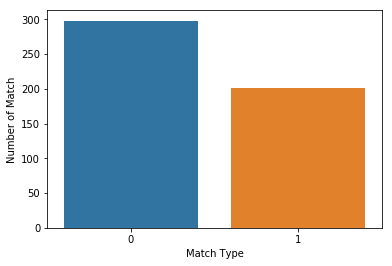

In [11]:
sns.countplot(train.match)
plt.xlabel('Match Type')
plt.ylabel('Number of Match')
plt.show()

In [12]:
train.dropna(inplace=True)
train.isnull().sum()
train=train.reset_index(drop=True)

## Since, our algorithm cannot understand the yes/no, we use something called LabelEncoder to convert the feature into 0/1.

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['f.smoker']=le.fit_transform(train['f.smoker'])
train['f.child']=le.fit_transform(train['f.child'])
train['m.smoker']=le.fit_transform(train['m.smoker'])
train['m.child']=le.fit_transform(train['m.child'])
train.head(3)

,f.age,f.smoker,f.child,f.interest,f.address,m.age,m.smoker,m.child,m.interest,m.address,match
0,23,0,0,football:fashion,102 1st Ave New York NY,30,0,0,snowboarding:knitting:computers:shopping:tv:tr...,151 W 34th St New York NY,1
1,50,0,0,fashion:opera:tv:travel,686 Avenue of the Americas New York NY,49,1,1,soccer:fashion:photography:computers:camping:m...,824 3rd Ave New York NY,0
2,46,0,1,skiing:reading:knitting:writing:shopping,154 7th Ave New York NY,19,0,0,dancing:opera:travel,1560 Broadway New York NY,0


0    380
1    112
Name: m.smoker, dtype: int64
0    407
1     85
Name: f.smoker, dtype: int64


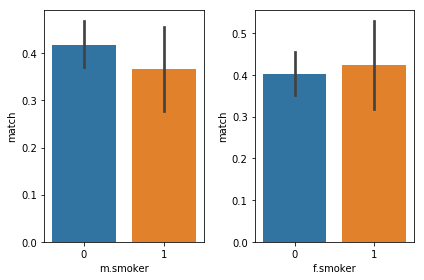

In [14]:
print(train['m.smoker'].value_counts())
print(train['f.smoker'].value_counts())
sns.barplot(x='m.smoker',y='match',data=train,ax=plt.subplot(121))
sns.barplot(x='f.smoker',y='match',data=train,ax=plt.subplot(122))
plt.tight_layout()
plt.show()
plt.show()

## Using heatmap to understand the correlation between all the features.

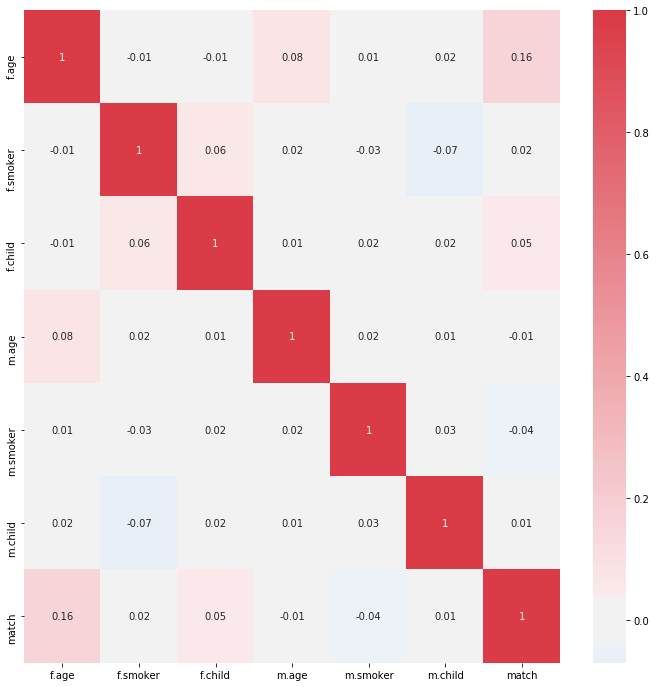

f.age       0.16
f.smoker    0.02
f.child     0.05
m.age      -0.01
m.smoker   -0.04
m.child     0.01
match       1.00
Name: match, dtype: float64

In [15]:
cols=['f.age','f.smoker','f.child','m.age','m.smoker','m.child','match']
cor_matrix=train[cols].corr().round(2)
fig=plt.figure(figsize=(12,12))
sns.heatmap(cor_matrix,annot=True,center=0,cmap=sns.diverging_palette(250,10,as_cmap=True),ax=plt.subplot(111))
plt.show()
cor_matrix['match']

In [16]:
print(train['m.address'].value_counts(ascending=False))
train["match"].groupby(train["m.address"]).count()

336 E 23rd St New York NY                  24
427 10th Ave New York NY                   24
966 3rd Ave New York NY                    22
14 E 47th St New York NY                   22
404 E 14th St New York NY                  22
2271 Broadway New York NY                  22
39 Union sq W New York NY                  21
102 1st Ave New York NY                    21
824 3rd Ave New York NY                    21
2049 Broadway New York NY                  20
1560 Broadway New York NY                  19
27 3rd Ave New York NY                     18
1083 2nd Ave New York NY                   17
451 Lexington Ave New York NY              17
220 W 42nd St New York NY                  17
90 Maiden Ln New York NY                   16
26 Bowery New York NY                      15
208 Varick St New York NY                  15
688 8th Ave New York NY                    14
686 Avenue of the Americas New York NY     14
3794 Broadway New York NY                  14
541 Avenue of the Americas New Yor

m.address
102 1st Ave New York NY                    21
1083 2nd Ave New York NY                   17
1188 Avenue of the Americas New York NY    11
1286 1st Ave New York NY                   13
14 E 47th St New York NY                   22
1499 3rd Ave New York NY                   13
151 W 34th St New York NY                  14
154 7th Ave New York NY                     9
1560 Broadway New York NY                  19
2049 Broadway New York NY                  20
208 Varick St New York NY                  15
220 W 42nd St New York NY                  17
2271 Broadway New York NY                  22
26 Bowery New York NY                      15
27 3rd Ave New York NY                     18
336 E 23rd St New York NY                  24
3794 Broadway New York NY                  14
39 Union sq W New York NY                  21
404 E 14th St New York NY                  22
427 10th Ave New York NY                   24
451 Lexington Ave New York NY              17
541 Avenue of the Americ

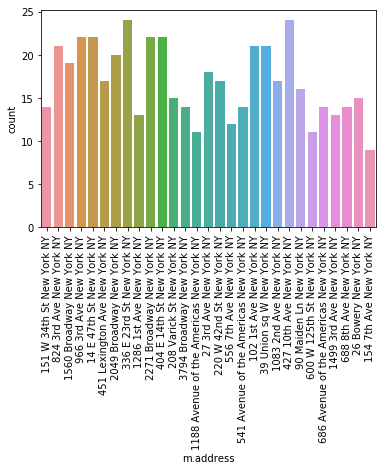

In [17]:
g=sns.countplot(train['m.address'])
g=plt.setp(g.get_xticklabels(),rotation=90)
plt.show()

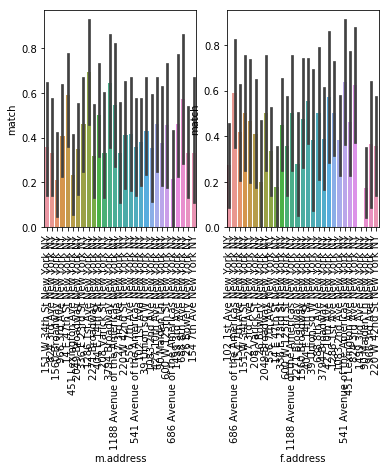

In [18]:
g=sns.barplot(x=train['m.address'],y=train['match'],ax=plt.subplot(121))
f=sns.barplot(x=train['f.address'],y=train['match'],ax=plt.subplot(122))
g=plt.setp(g.get_xticklabels(),rotation=90)
f=plt.setp(f.get_xticklabels(),rotation=90)
plt.show()

## According to me, if two people have common interests, there is higher chance of them dating.
So, splitting feature called interests. To find common interest between people

In [19]:
train['m.interest'][0].split(":")

['snowboarding', 'knitting', 'computers', 'shopping', 'tv', 'travel']

In [20]:
list_minterest=[]
for i in range(len(train['m.interest'])):
    try:
        l2=train['m.interest'][i].split(":")
        list_minterest.extend(l2)
    except:
        i+=1
        l2=train['m.interest'][i].split(":")
        list_minterest.extend(l2)
        
list_minterest=set(list_minterest)
list_minterest

{'animals',
 'art',
 'camping',
 'computers',
 'cooking',
 'dancing',
 'fashion',
 'football',
 'knitting',
 'movies',
 'opera',
 'photography',
 'reading',
 'running',
 'scrabble',
 'shopping',
 'skiing',
 'snowboarding',
 'soccer',
 'travel',
 'tv',
 'writing'}

In [21]:
list_finterest=[]
for i in range(len(train['f.interest'])):
    try:
        l2=train['f.interest'][i].split(":")
        list_finterest.extend(l2)
    except:
        i+=1
        l2=train['f.interest'][i].split(":")
        list_finterest.extend(l2)
        
list_finterest=set(list_finterest)
list_finterest

{'animals',
 'art',
 'camping',
 'computers',
 'cooking',
 'dancing',
 'fashion',
 'football',
 'knitting',
 'movies',
 'opera',
 'photography',
 'reading',
 'running',
 'scrabble',
 'shopping',
 'skiing',
 'snowboarding',
 'soccer',
 'travel',
 'tv',
 'writing'}

Interest of male and female are common.

In [22]:
for i in range(train.shape[0]):
    try:
        l1=train['m.interest'][i].split(":")
        l2=train['f.interest'][i].split(":")
        common_interest=0
        common_interest=len(list(set(l1).intersection(l2)))
        train.loc[i,"common_interest"]=common_interest
    except:
        continue
        

## Another, feature engineering could be age difference between two people. If there is a great age difference,
the probability of matching might be less.

So, let's see if that's true with this dataset.

In [23]:
import numpy as np
train.loc[:,'age_diff']=np.abs(train.loc[:,'m.age']-train.loc[:,'f.age'])

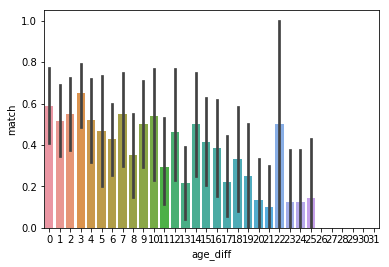

In [33]:
#age_diff, match
sns.barplot(y=train['match'],x=train['age_diff'])
plt.show()

Another idea. If two people smoke, do they have a higher chancing of liking each other and matching ?
Let's find out.

In [34]:
for i in range(train.shape[0]):
    if train.loc[i,'m.smoker']==train.loc[i,'f.smoker']:
        train.loc[i,'common_smoking']=1
    else:
        train.loc[i,'common_smoking']=0
      

In [52]:
train[['common_smoking','match']].groupby(["common_smoking"]).mean()

,match
common_smoking,
0.0,0.386503
1.0,0.416413


Yes!! People who smoke have a higher chance of matching with people who smoke.

In [53]:
cols=['f.age','f.smoker','f.child','m.age','m.smoker','m.child','common_interest','age_diff']
xdata=train[cols]
ydata=train['match']

print(xdata.shape)
print(ydata.shape)

(492, 8)
(492,)


# I am using various classifying Algorithms to classify matching.

1)LogisiticRegression()

2)RidgeClassifier()-Using various alpha/regularization values to see the change in accuracy.

3)LinearDiscriminantAnalysis()

4)QuadraticDiscriminantAnalysis()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

xtrain,xvalid,ytrain,yvalid=train_test_split(xdata,ydata,test_size=0.3,random_state=7)
clf=LogisticRegression()
clf.fit(xtrain,ytrain)

ypred=clf.predict(xvalid)
print(clf.score(xvalid,yvalid))
print(classification_report(yvalid,ypred))


0.621621621622
             precision    recall  f1-score   support

          0       0.66      0.69      0.67        84
          1       0.57      0.53      0.55        64

avg / total       0.62      0.62      0.62       148



In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix
xtrain,xvalid,ytrain,yvalid=train_test_split(xdata,ydata,test_size=0.3,random_state=7)
for i in [0.001,0.01,1,10,100]:
    clf=RidgeClassifier(alpha=i)
    clf.fit(xtrain,ytrain)

    ypred=clf.predict(xvalid)
    print(clf.score(xvalid,yvalid))
    print(classification_report(yvalid,ypred))

0.635135135135
             precision    recall  f1-score   support

          0       0.66      0.74      0.70        84
          1       0.59      0.50      0.54        64

avg / total       0.63      0.64      0.63       148

0.635135135135
             precision    recall  f1-score   support

          0       0.66      0.74      0.70        84
          1       0.59      0.50      0.54        64

avg / total       0.63      0.64      0.63       148

0.635135135135
             precision    recall  f1-score   support

          0       0.66      0.74      0.70        84
          1       0.59      0.50      0.54        64

avg / total       0.63      0.64      0.63       148

0.635135135135
             precision    recall  f1-score   support

          0       0.66      0.74      0.70        84
          1       0.59      0.50      0.54        64

avg / total       0.63      0.64      0.63       148

0.621621621622
             precision    recall  f1-score   support

          0

In [56]:
from sklearn.neighbors import KNeighborsClassifier
xtrain,xvalid,ytrain,yvalid=train_test_split(xdata,ydata,test_size=0.3,random_state=7)
clf=KNeighborsClassifier(n_neighbors=25)
clf.fit(xtrain,ytrain)
ypred=clf.predict(xvalid)

print(clf.score(xvalid,yvalid))
print(classification_report(yvalid,ypred))

0.594594594595
             precision    recall  f1-score   support

          0       0.65      0.63      0.64        84
          1       0.53      0.55      0.54        64

avg / total       0.60      0.59      0.60       148



In [57]:
xtrain,xvalid,ytrain,yvalid=train_test_split(xdata,ydata,test_size=0.3,random_state=7)
clf=LinearDiscriminantAnalysis()
clf.fit(xtrain,ytrain)

ypred=clf.predict(xvalid)
print(clf.score(xvalid,yvalid))
print(classification_report(yvalid,ypred))


0.628378378378
             precision    recall  f1-score   support

          0       0.66      0.73      0.69        84
          1       0.58      0.50      0.54        64

avg / total       0.62      0.63      0.62       148



In [58]:
from pandas_ml import ConfusionMatrix
xtrain,xvalid,ytrain,yvalid=train_test_split(xdata,ydata,test_size=0.31,random_state=7)
clf=QuadraticDiscriminantAnalysis()
clf.fit(xtrain,ytrain)

ypred=clf.predict(xvalid)
print(clf.score(xvalid,yvalid))
print(classification_report(yvalid,ypred))
print(clf.get_params)
print(confusion_matrix(ypred,yvalid))

0.967320261438
             precision    recall  f1-score   support

          0       0.97      0.98      0.97        87
          1       0.97      0.95      0.96        66

avg / total       0.97      0.97      0.97       153

<bound method BaseEstimator.get_params of QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)>
[[85  3]
 [ 2 63]]


## QuadraticDiscriminantAnalysis()
It gives us the highest accuracy values of around 97%, which acutally doesn't sound bad for matching two people.
